<a href="https://colab.research.google.com/github/ClarisseAlvarenga/DataScience_Comex_estudos/blob/master/C%C3%B3pia_de_An%C3%A1lise_RBA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install ydata-profiling
#!pip install sweetviz

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from ydata_profiling import ProfileReport
import sweetviz as sv
from sklearn.cluster import KMeans


In [ ]:
dados = pd.read_excel('/content/Amostra dados negativados.xlsx')

In [ ]:
dados.head()

,ID,Cliente BB (anos),PONTUACAO_ROC,NT_RISCO,OP_C_PAISES_EM_LISTA_REST
0,1,15.583333,-2.72,-1.017755,False
1,2,27.052778,-2.63,-4.037228,True
2,3,15.955556,-2.57,-0.000573,True
3,4,24.477778,-3.07,-0.001145,False
4,5,24.555556,-3.18,-2.022910,True


In [ ]:
dados['OP_C_PAISES_EM_LISTA_REST'].fillna(0, inplace=True)

In [ ]:
dados['OP_C_PAISES_EM_LISTA_REST'].replace('SIM', 1, inplace=True)

In [ ]:
dados.head()

,ID,Cliente BB (anos),PONTUACAO_ROC,NT_RISCO,OP_C_PAISES_EM_LISTA_REST
0,1,15.583333,-2.72,-1.017755,False
1,2,27.052778,-2.63,-4.037228,True
2,3,15.955556,-2.57,-0.000573,True
3,4,24.477778,-3.07,-0.001145,False
4,5,24.555556,-3.18,-2.022910,True


In [ ]:
dados['OP_C_PAISES_EM_LISTA_REST'] = dados['OP_C_PAISES_EM_LISTA_REST'].astype('boolean', copy=False)

In [ ]:
dados.head()

,ID,Cliente BB (anos),PONTUACAO_ROC,NT_RISCO,OP_C_PAISES_EM_LISTA_REST
0,1,15.583333,-2.72,-1.017755,False
1,2,27.052778,-2.63,-4.037228,True
2,3,15.955556,-2.57,-0.000573,True
3,4,24.477778,-3.07,-0.001145,False
4,5,24.555556,-3.18,-2.022910,True


In [ ]:
dados.shape

(1762, 5)

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1762 entries, 0 to 1761
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         1762 non-null   int64  
 1   Cliente BB (anos)          1762 non-null   float64
 2   PONTUACAO_ROC              1762 non-null   float64
 3   NT_RISCO                   1762 non-null   float64
 4   OP_C_PAISES_EM_LISTA_REST  1762 non-null   boolean
dtypes: boolean(1), float64(3), int64(1)
memory usage: 58.6 KB


In [ ]:
dados.set_index('ID', inplace=True)

In [ ]:
dados.head()

,Cliente BB (anos),PONTUACAO_ROC,NT_RISCO,OP_C_PAISES_EM_LISTA_REST
ID,,,,
1,15.583333,-2.72,-1.017755,False
2,27.052778,-2.63,-4.037228,True
3,15.955556,-2.57,-0.000573,True
4,24.477778,-3.07,-0.001145,False
5,24.555556,-3.18,-2.022910,True


In [ ]:
dados.corr()

,Cliente BB (anos),PONTUACAO_ROC,NT_RISCO,OP_C_PAISES_EM_LISTA_REST
Cliente BB (anos),1.000000,0.263306,0.010371,0.112173
PONTUACAO_ROC,0.263306,1.000000,0.126097,0.079488
NT_RISCO,0.010371,0.126097,1.000000,0.060496
OP_C_PAISES_EM_LISTA_REST,0.112173,0.079488,0.060496,1.000000


In [ ]:
from sklearn.preprocessing import StandardScaler, Normalizer, PowerTransformer

In [ ]:
X = dados[['Cliente BB (anos)', 'PONTUACAO_ROC', 'NT_RISCO']]

In [ ]:
standard = StandardScaler().fit(X)
normal = Normalizer().fit(X)
power = PowerTransformer().fit(X)

In [ ]:
teste1 = pd.DataFrame(standard.transform(X))
teste1

,0,1,2
0,-0.295939,0.441026,0.655118
1,1.559574,0.571697,-1.119458
2,-0.235722,0.658812,1.252927
3,1.142994,-0.067140,1.252590
4,1.155577,-0.226850,0.064378
...,...,...,...
1757,1.424759,0.542659,0.069091
1758,-0.298636,0.484583,0.074813
1759,-0.394804,0.295836,-1.107003
1760,0.401058,0.310355,-0.513571


In [ ]:
teste1.columns = ['Cliente BB (anos)', 'PONTUACAO_ROC', 'NT_RISCO']
teste1

,Cliente BB (anos),PONTUACAO_ROC,NT_RISCO
0,-0.295939,0.441026,0.655118
1,1.559574,0.571697,-1.119458
2,-0.235722,0.658812,1.252927
3,1.142994,-0.067140,1.252590
4,1.155577,-0.226850,0.064378
...,...,...,...
1757,1.424759,0.542659,0.069091
1758,-0.298636,0.484583,0.074813
1759,-0.394804,0.295836,-1.107003
1760,0.401058,0.310355,-0.513571


In [ ]:
teste1.index = dados.index
teste1['OP_C_PAISES_EM_LISTA_REST'] = dados['OP_C_PAISES_EM_LISTA_REST']
teste1

,Cliente BB (anos),PONTUACAO_ROC,NT_RISCO,OP_C_PAISES_EM_LISTA_REST
ID,,,,
1,-0.295939,0.441026,0.655118,False
2,1.559574,0.571697,-1.119458,True
3,-0.235722,0.658812,1.252927,True
4,1.142994,-0.067140,1.252590,False
5,1.155577,-0.226850,0.064378,True
...,...,...,...,...
1758,1.424759,0.542659,0.069091,False
1759,-0.298636,0.484583,0.074813,True
1760,-0.394804,0.295836,-1.107003,False


In [ ]:
teste2 = pd.DataFrame(normal.transform(X))
teste2.columns = ['Cliente BB (anos)', 'PONTUACAO_ROC', 'NT_RISCO']
teste2.index = dados.index
teste2['OP_C_PAISES_EM_LISTA_REST'] = dados['OP_C_PAISES_EM_LISTA_REST']
teste2

,Cliente BB (anos),PONTUACAO_ROC,NT_RISCO,OP_C_PAISES_EM_LISTA_REST
ID,,,,
1,0.983074,-0.171591,-0.064205,False
2,0.984506,-0.095711,-0.146923,True
3,0.987275,-0.159023,-0.000035,True
4,0.992227,-0.124445,-0.000046,False
5,0.988425,-0.128003,-0.081427,True
...,...,...,...,...
1758,0.992036,-0.100265,-0.076235,False
1759,0.977552,-0.168926,-0.125919,True
1760,0.950261,-0.178981,-0.254891,False


In [ ]:
kmeans = KMeans(n_clusters=5, random_state=0, n_init="auto").fit(dados)
kmeans_standard = KMeans(n_clusters=5, random_state=0, n_init="auto").fit(teste1)

In [ ]:
dados['CLUSTER'] = kmeans.predict(dados)
dados['CLUSTER_STD'] = kmeans_standard.predict(teste1)

In [ ]:
kmeans_normal = KMeans(n_clusters=5, random_state=0, n_init="auto").fit(teste2)
dados['CLUSTER_NOR'] = kmeans_normal.predict(teste2)

In [ ]:
dados.head()

,Cliente BB (anos),PONTUACAO_ROC,NT_RISCO,OP_C_PAISES_EM_LISTA_REST,CLUSTER,CLUSTER_STD,CLUSTER_NOR
ID,,,,,,,
1,15.583333,-2.72,-1.017755,False,0,4,3
2,27.052778,-2.63,-4.037228,True,3,2,0
3,15.955556,-2.57,-0.000573,True,0,4,0
4,24.477778,-3.07,-0.001145,False,3,2,3
5,24.555556,-3.18,-2.022910,True,3,2,0


In [ ]:
dados.sample(20)

,Cliente BB (anos),PONTUACAO_ROC,NT_RISCO,OP_C_PAISES_EM_LISTA_REST,CLUSTER,CLUSTER_STD,CLUSTER_NOR
ID,,,,,,,
371,13.961111,-2.95,-4.037228,False,0,3,1
262,24.341667,-4.22,-4.029210,False,3,3,3
1155,15.330556,-2.60,-3.010882,False,0,0,1
910,16.080556,-2.94,-0.005727,True,0,4,0
40,15.322222,-2.83,-4.035510,False,0,3,1
538,15.905556,-2.84,-2.025200,False,0,0,3
797,16.125000,-3.83,-2.009164,False,0,0,3
1101,15.277778,-2.96,-0.016037,False,0,4,3
476,14.769444,-2.56,-2.030928,True,0,0,0


<Axes: xlabel='CLUSTER_NOR', ylabel='CLUSTER'>

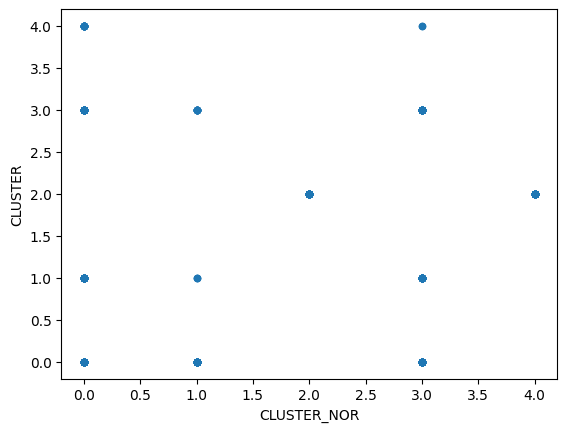

In [ ]:
dados.plot(kind='scatter', y='CLUSTER', x='CLUSTER_NOR')

<Axes: xlabel='NT_RISCO', ylabel='CLUSTER_STD'>

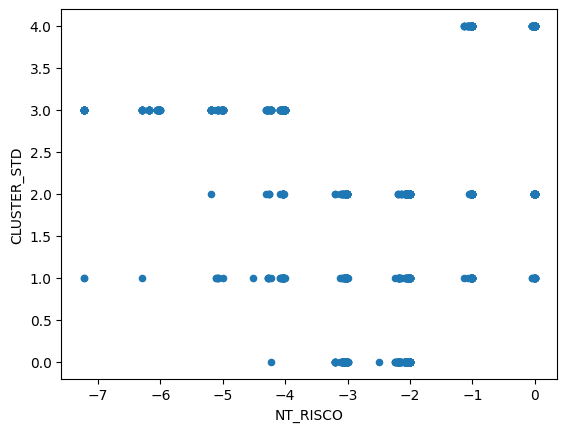

In [ ]:
dados.plot(kind='scatter', y='CLUSTER_STD', x='NT_RISCO')

<Axes: xlabel='CLUSTER', ylabel='Cliente BB (anos)'>

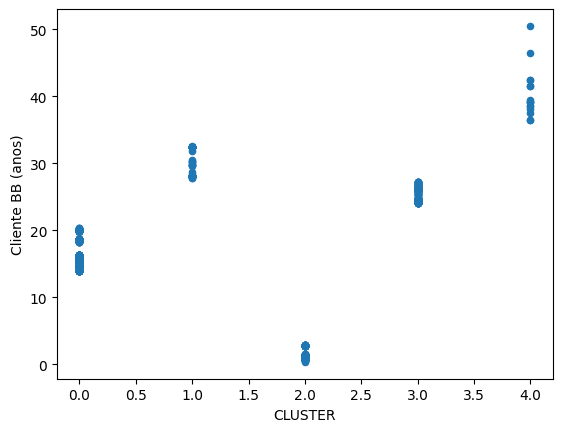

In [ ]:
dados.plot(kind='scatter', x='CLUSTER', y='Cliente BB (anos)')

<Axes: xlabel='NT_RISCO', ylabel='PONTUACAO_ROC'>

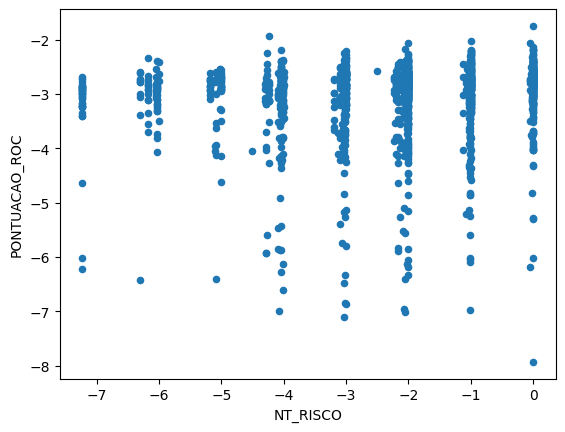

In [ ]:
dados.plot(kind='scatter', x='NT_RISCO', y='PONTUACAO_ROC')

In [ ]:
profile = ProfileReport(dados, title="RBA dados negativados")

In [ ]:
profile.to_html()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

'<!doctype html><html lang=en><head><meta charset=utf-8><meta name=viewport content="width=device-width, initial-scale=1, shrink-to-fit=no"><meta name=description content="Profile report generated by YData! Visit us at https://ydata.ai"><meta name=author content="YData and the open source community."><meta name=generator content="Pandas Profiling vv4.5.1"><meta name=url content=https://github.com/ydataai/ydata-profiling><meta name=date content="2023-10-02 23:33:03.778924"><title>RBA dados negativados</title><style>\n/*!\n * Bootstrap v3.3.7 (http://getbootstrap.com)\n * Copyright 2011-2016 Twitter, Inc.\n * Licensed under MIT (https://github.com/twbs/bootstrap/blob/master/LICENSE)\n *//*! normalize.css v3.0.3 | MIT License | github.com/necolas/normalize.css */html{font-family:sans-serif;-webkit-text-size-adjust:100%;-ms-text-size-adjust:100%}body{margin:0}article,aside,details,figcaption,figure,footer,header,hgroup,main,menu,nav,section,summary{display:block}audio,canvas,progress,video

In [ ]:
dados.CLUSTER = dados.CLUSTER.astype('int64')
dados.CLUSTER_STD = dados.CLUSTER_STD.astype('int64')
dados.CLUSTER_NOR = dados.CLUSTER_NOR.astype('int64')
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1762 entries, 1 to 1762
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Cliente BB (anos)          1762 non-null   float64
 1   PONTUACAO_ROC              1762 non-null   float64
 2   NT_RISCO                   1762 non-null   float64
 3   OP_C_PAISES_EM_LISTA_REST  1762 non-null   boolean
 4   CLUSTER                    1762 non-null   int64  
 5   CLUSTER_STD                1762 non-null   int64  
 6   CLUSTER_NOR                1762 non-null   int64  
dtypes: boolean(1), float64(3), int64(3)
memory usage: 164.3 KB


In [ ]:
my_report = sv.analyze(dados)
my_report.show_html()

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [ ]:
dados.CLUSTER.info()

<class 'pandas.core.series.Series'>
Int64Index: 1762 entries, 1 to 1762
Series name: CLUSTER
Non-Null Count  Dtype
--------------  -----
1762 non-null   int64
dtypes: int64(1)
memory usage: 92.1 KB


In [ ]:
profile.to_file('Análise RBA negativos')

/usr/local/lib/python3.10/dist-packages/ydata_profiling/profile_report.py:360: UserWarning: Extension  not supported. For now we assume .html was intended. To remove this warning, please use .html or .json.
  warnings.warn(


Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
X = dados[['PONTUACAO_ROC', 'NT_RISCO',
       'OP_C_PAISES_EM_LISTA_REST']]
kmeans2 = kmeans = KMeans(n_clusters=5, random_state=0, n_init="auto").fit(X)

In [ ]:
dados.columns

Index(['Cliente BB (anos)', 'PONTUACAO_ROC', 'NT_RISCO',
       'OP_C_PAISES_EM_LISTA_REST', 'CLUSTER'],
      dtype='object')

In [ ]:
dados['CLUSTER SEM CLIENTE'] = kmeans2.predict(X)

In [ ]:
dados.head()

,Cliente BB (anos),PONTUACAO_ROC,NT_RISCO,OP_C_PAISES_EM_LISTA_REST,CLUSTER,CLUSTER SEM CLIENTE
ID,,,,,,
1,15.583333,2.72,1.017755,False,0,1
2,27.052778,2.63,4.037228,True,3,3
3,15.955556,2.57,0.000573,True,0,1
4,24.477778,3.07,0.001145,False,3,1
5,24.555556,3.18,2.022910,True,3,0


In [ ]:
dados[['CLUSTER','CLUSTER SEM CLIENTE']].corr()

,CLUSTER,CLUSTER SEM CLIENTE
CLUSTER,1.000000,0.002624
CLUSTER SEM CLIENTE,0.002624,1.000000


<Axes: xlabel='CLUSTER', ylabel='CLUSTER SEM CLIENTE'>

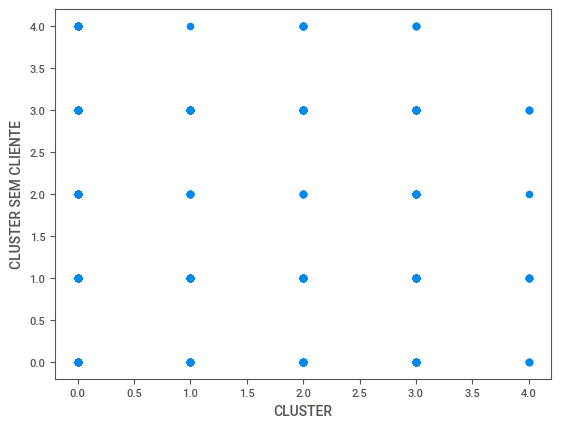

In [ ]:
dados.plot(kind='scatter', x='CLUSTER', y='CLUSTER SEM CLIENTE')

In [ ]:
dados.head()

,Cliente BB (anos),PONTUACAO_ROC,NT_RISCO,OP_C_PAISES_EM_LISTA_REST,CLUSTER,CLUSTER SEM CLIENTE
ID,,,,,,
1,15.583333,2.72,1.017755,False,0,1
2,27.052778,2.63,4.037228,True,3,3
3,15.955556,2.57,0.000573,True,0,1
4,24.477778,3.07,0.001145,False,3,1
5,24.555556,3.18,2.022910,True,3,0


In [ ]:
profile2 = ProfileReport(dados, title="Pandas Profiling Report RBA dois clusters")
profile2.to_file('AnáliseRBA2.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
dados['CLUSTER SEM CLIENTE'] = dados['CLUSTER SEM CLIENTE'].astype('int64')

In [ ]:
my_report2 = sv.analyze(dados)
my_report2.show_html('Sweetviz RBA dois clusters.html')

                                             |          | [  0%]   00:00 -> (? left)

Report Sweetviz RBA dois clusters.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


<Axes: xlabel='PONTUACAO_ROC', ylabel='CLUSTER SEM CLIENTE'>

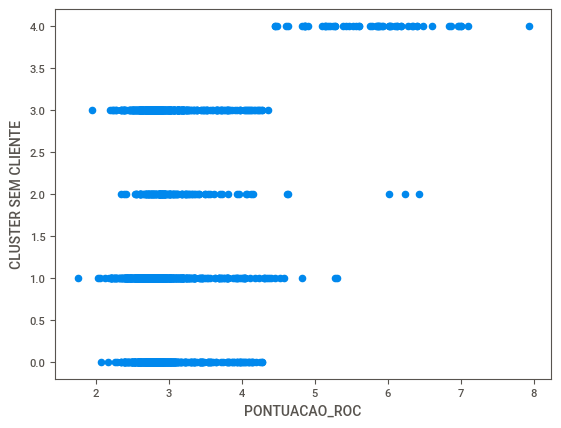

In [ ]:
dados.plot(kind='scatter', x='PONTUACAO_ROC', y='CLUSTER SEM CLIENTE')

<Axes: xlabel='NT_RISCO', ylabel='CLUSTER SEM CLIENTE'>

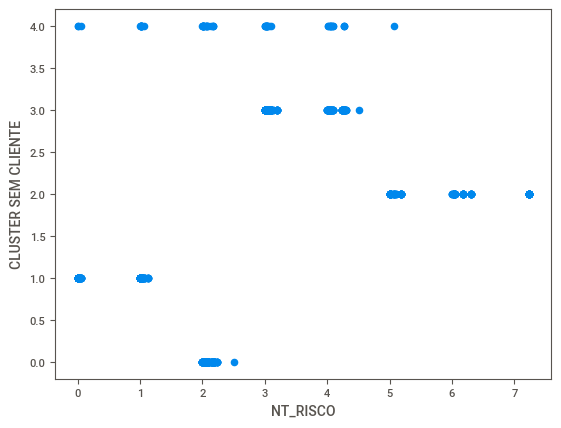

In [ ]:
dados.plot(kind='scatter', x='NT_RISCO', y='CLUSTER SEM CLIENTE')

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1762 entries, 1 to 1762
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Cliente BB (anos)          1762 non-null   float64
 1   PONTUACAO_ROC              1762 non-null   float64
 2   NT_RISCO                   1762 non-null   float64
 3   OP_C_PAISES_EM_LISTA_REST  1762 non-null   boolean
 4   CLUSTER                    1762 non-null   int64  
 5   CLUSTER SEM CLIENTE        1762 non-null   int64  
dtypes: boolean(1), float64(3), int64(2)
memory usage: 150.6 KB


In [ ]:
dados.to_excel('Amostra_clusters_risco_negativado.xlsx')